# EDA - retail_sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_parquet('/home/gabriel/Documentos/retail_sales_pipeline/data/processed/retail_data_transformed.parquet')

In [8]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Total_Sales,Type,Size,Revenue_Estimate
0,12,26/07/2013,90.27,3.865,1008.91,232.99,6,284.49,2132.08,NA,NA,False,1.442872e+08,B,112238,1.619451e+13
1,12,19/07/2013,93.75,3.823,4349.54,687.86,93.05,1361.92,1614.2,NA,NA,False,1.442872e+08,B,112238,1.619451e+13
2,12,12/07/2013,92.61,3.737,3409.33,977.89,80.96,8574.06,1997.97,NA,NA,False,1.442872e+08,B,112238,1.619451e+13
3,12,05/07/2013,101.95,3.753,10258.3,1663.37,541.21,16546.54,1213.84,NA,NA,False,1.442872e+08,B,112238,1.619451e+13
4,12,28/06/2013,89.94,3.781,8745.83,262.16,11.97,9475.17,6249.56,NA,NA,False,1.442872e+08,B,112238,1.619451e+13


In [10]:
df.tail()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             8190 non-null   int32  
 1   Date              8190 non-null   object 
 2   Temperature       8190 non-null   float64
 3   Fuel_Price        8190 non-null   float64
 4   MarkDown1         8190 non-null   object 
 5   MarkDown2         8190 non-null   object 
 6   MarkDown3         8190 non-null   object 
 7   MarkDown4         8190 non-null   object 
 8   MarkDown5         8190 non-null   object 
 9   CPI               8190 non-null   object 
 10  Unemployment      8190 non-null   object 
 11  IsHoliday         8190 non-null   bool   
 12  Total_Sales       8190 non-null   float64
 13  Type              8190 non-null   object 
 14  Size              8190 non-null   int32  
 15  Revenue_Estimate  8190 non-null   float64
dtypes: bool(1), float64(4), int32(2), object(9

In [11]:
df.describe

<bound method NDFrame.describe of       Store        Date  Temperature  Fuel_Price MarkDown1 MarkDown2  \
0        12  26/07/2013        90.27       3.865   1008.91    232.99   
1        12  19/07/2013        93.75       3.823   4349.54    687.86   
2        12  12/07/2013        92.61       3.737   3409.33    977.89   
3        12  05/07/2013       101.95       3.753   10258.3   1663.37   
4        12  28/06/2013        89.94       3.781   8745.83    262.16   
...     ...         ...          ...         ...       ...       ...   
8185     45  05/03/2010        37.13       2.777        NA        NA   
8186     45  26/02/2010        34.89       2.754        NA        NA   
8187     45  19/02/2010        31.27       2.745        NA        NA   
8188     45  12/02/2010        27.73       2.773        NA        NA   
8189     45  05/02/2010        27.31       2.784        NA        NA   

     MarkDown3 MarkDown4 MarkDown5          CPI Unemployment  IsHoliday  \
0            6    284.49  

## Análise do DataFrame e Ações Necessárias

### Observações:
- **Dados Faltantes ou Incompletos**: Nenhuma das colunas tem valores nulos, o que é positivo para a análise.

### Ações Recomendadas

1. **Verificação de Consistência da Coluna `Date`**:
   - A coluna `Date` está no formato `object`, e pode ser convertida para um formato de data para facilitar a manipulação temporal

In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


## Visualizações

### 1. **Distribuição das Vendas (`Total_Sales`)**
   **Objetivo**: O **histograma** ou **KDE plot** é usado para entender a distribuição dos valores de vendas. Ele ajuda a identificar se as vendas seguem uma distribuição normal, se há inclinação (skewness), e a presença de outliers. O **boxplot** é ideal para visualizar a dispersão dos dados e identificar outliers.

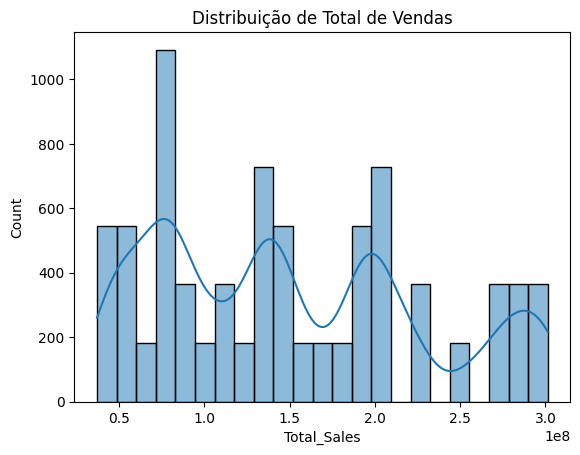

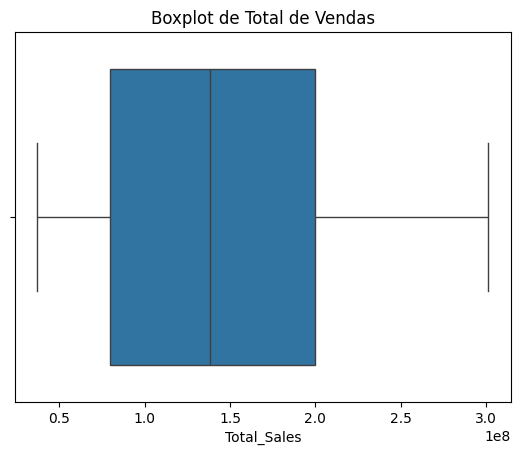

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma
sns.histplot(df['Total_Sales'], kde=True)
plt.title('Distribuição de Total de Vendas')
plt.show()

# Boxplot
sns.boxplot(x=df['Total_Sales'])
plt.title('Boxplot de Total de Vendas')
plt.show()


### 2. **Vendas ao Longo do Tempo**
   **Objetivo**: A **linha do tempo** permite visualizar a variação das vendas ao longo do tempo. Esse gráfico é útil para identificar tendências sazonais, padrões de crescimento ou queda nas vendas, e o impacto de eventos temporais como feriados ou promoções.


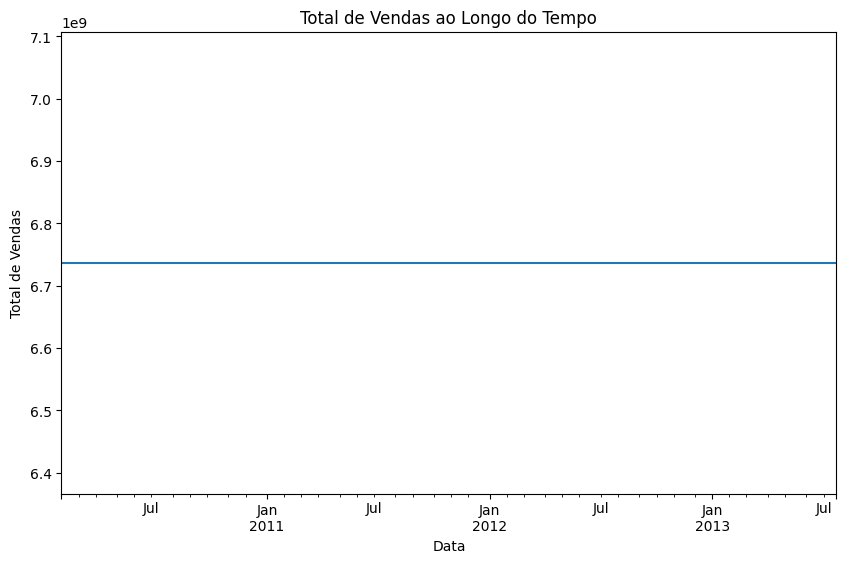

In [16]:
df.groupby('Date')['Total_Sales'].sum().plot(kind='line', figsize=(10, 6))
plt.title('Total de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.show()


### 3. **Correlação entre Variáveis Numéricas**
   **Objetivo**: O **heatmap** da matriz de correlação é usado para analisar como as variáveis numéricas estão relacionadas entre si. Ele ajuda a entender se existe uma correlação forte ou fraca entre variáveis como `Fuel_Price`, `Temperature`, `CPI`, `Unemployment` e `Total_Sales`, o que pode influenciar a estratégia de análise.

In [17]:
corr = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_Sales', 'Revenue_Estimate']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()


ValueError: could not convert string to float: 'NA'

### 4. **Relação entre Preço do Combustível e Vendas**
   **Objetivo**: O **scatter plot** exibe a relação entre o preço do combustível e as vendas. Ele permite visualizar como o preço do combustível afeta as vendas e se existe uma correlação significativa entre essas duas variáveis.

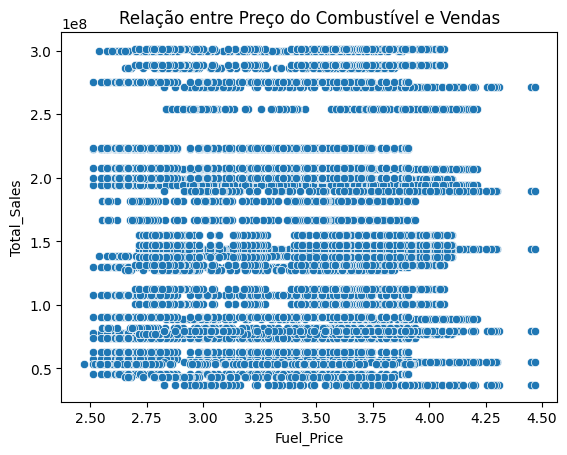

In [18]:
sns.scatterplot(x='Fuel_Price', y='Total_Sales', data=df)
plt.title('Relação entre Preço do Combustível e Vendas')
plt.show()


### 5. **Distribuição de Temperatura vs Vendas**
   **Objetivo**: O **scatter plot** ou **regression plot** ajuda a identificar a relação entre a temperatura e as vendas. Pode-se verificar se variações de temperatura têm um impacto direto no volume de vendas, com o **regression plot** permitindo visualizar tendências lineares.

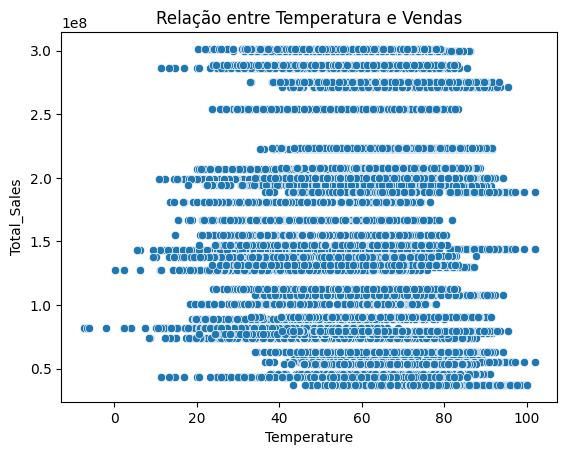

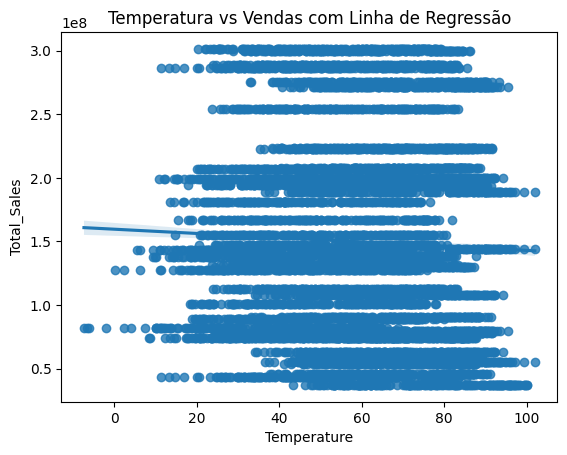

In [19]:
sns.scatterplot(x='Temperature', y='Total_Sales', data=df)
plt.title('Relação entre Temperatura e Vendas')
plt.show()

# Regression plot para mostrar tendência
sns.regplot(x='Temperature', y='Total_Sales', data=df)
plt.title('Temperatura vs Vendas com Linha de Regressão')
plt.show()


### 6. **Impacto dos Feriados (`IsHoliday`) nas Vendas**
   **Objetivo**: O **boxplot** compara as vendas entre dias de feriado e dias comuns. Isso é útil para entender se os feriados afetam significativamente as vendas, o que pode orientar campanhas sazonais ou promoções especiais.


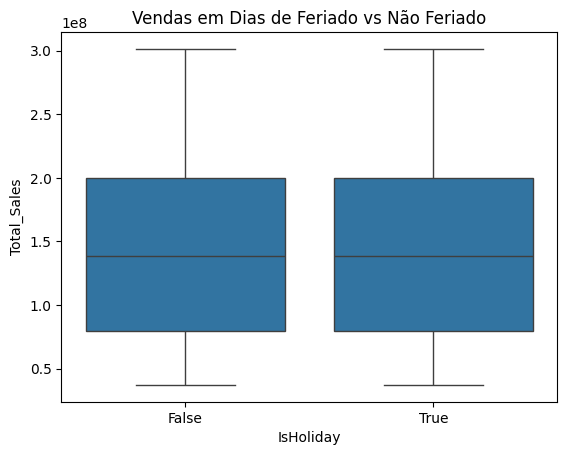

In [20]:
sns.boxplot(x='IsHoliday', y='Total_Sales', data=df)
plt.title('Vendas em Dias de Feriado vs Não Feriado')
plt.show()


### 7. **Vendas por Tipo de Loja (`Type`)**
   **Objetivo**: O **barplot** mostra o total de vendas por tipo de loja, permitindo identificar quais tipos de lojas (A, B ou C) geram mais vendas. Isso ajuda na segmentação do desempenho de cada formato de loja e pode influenciar decisões de investimento ou expansão.

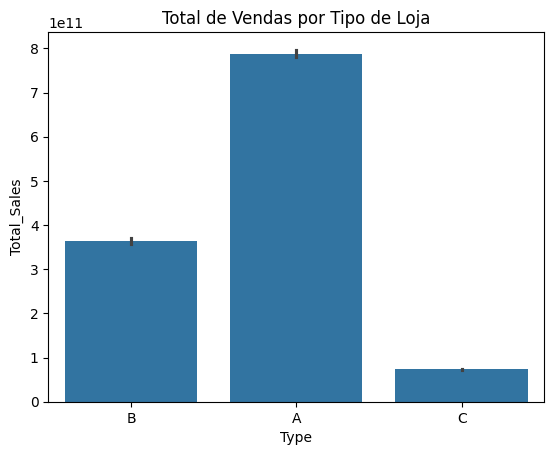

In [21]:
sns.barplot(x='Type', y='Total_Sales', data=df, estimator=sum)
plt.title('Total de Vendas por Tipo de Loja')
plt.show()


### 8. **Tamanho da Loja (`Size`) vs Vendas**
   **Objetivo**: O **scatter plot** explora a relação entre o tamanho da loja e as vendas. É possível verificar se lojas maiores geram mais vendas, e se existe uma correlação direta entre o tamanho do espaço físico e o volume de vendas.

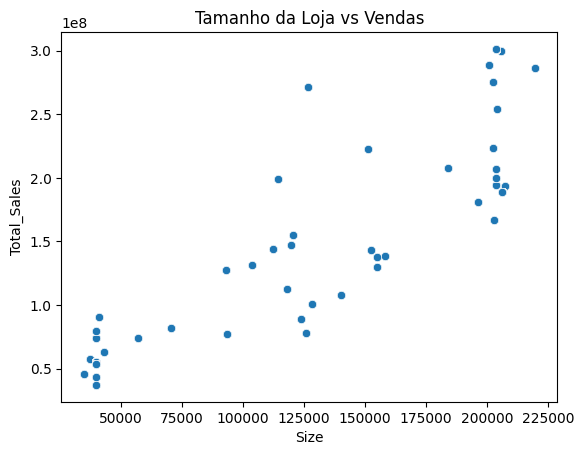

In [22]:
sns.scatterplot(x='Size', y='Total_Sales', data=df)
plt.title('Tamanho da Loja vs Vendas')
plt.show()


### 9. **Impacto dos Descontos (`MarkDowns`) nas Vendas**
   **Objetivo**: O **scatter plot** permite entender o efeito dos descontos (`MarkDown1`, `MarkDown2`, etc.) sobre o total de vendas. Ele ajuda a verificar se os descontos oferecidos em certos produtos aumentam as vendas e qual desconto é mais eficaz.

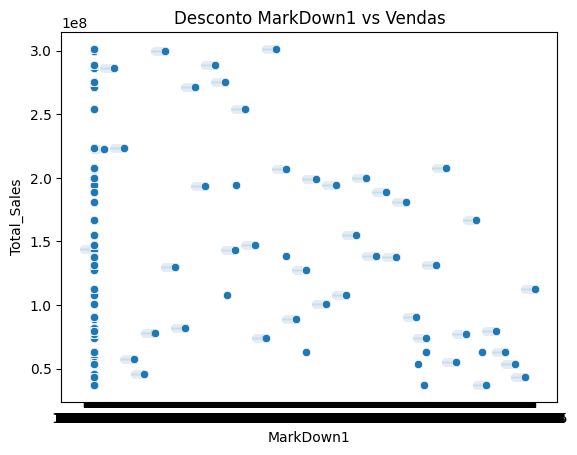

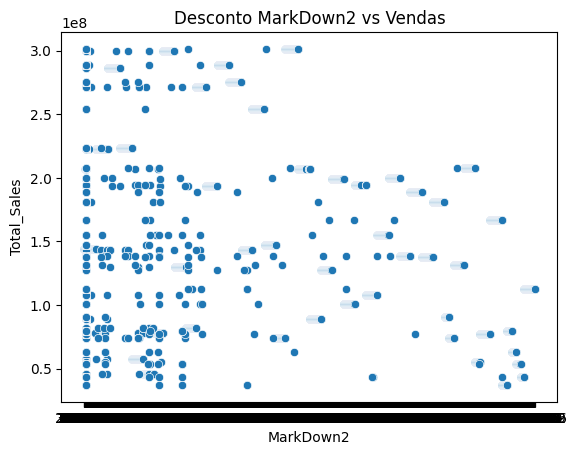

In [23]:
sns.scatterplot(x='MarkDown1', y='Total_Sales', data=df)
plt.title('Desconto MarkDown1 vs Vendas')
plt.show()

sns.scatterplot(x='MarkDown2', y='Total_Sales', data=df)
plt.title('Desconto MarkDown2 vs Vendas')
plt.show()


### 10. **Vendas por Loja (`Store`)**
   **Objetivo**: O **barplot** mostra o total de vendas por loja, permitindo identificar quais lojas têm o maior desempenho. Essa visualização ajuda a identificar as melhores e piores lojas em termos de receita, o que pode ser usado para estratégias regionais ou localizadas.

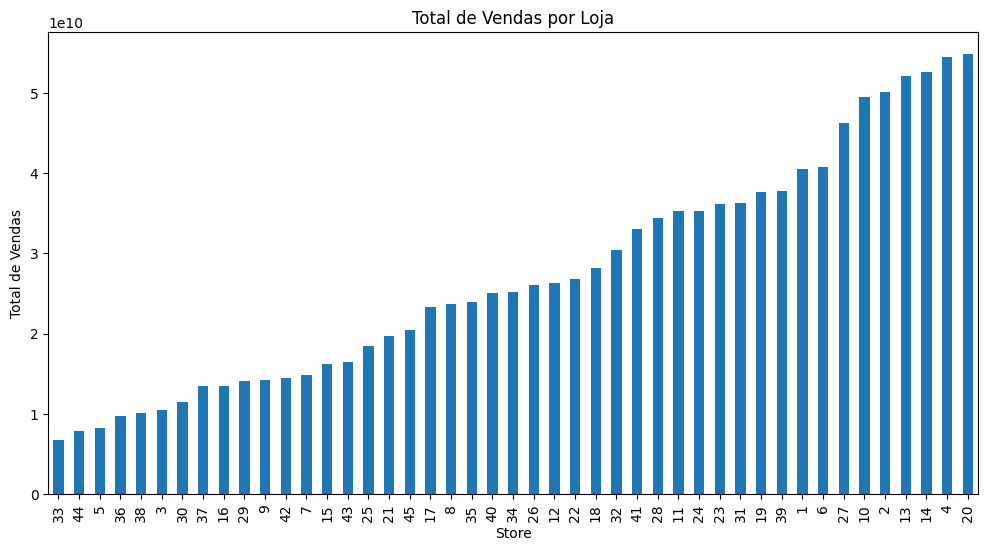

In [24]:
df.groupby('Store')['Total_Sales'].sum().sort_values().plot(kind='bar', figsize=(12, 6))
plt.title('Total de Vendas por Loja')
plt.ylabel('Total de Vendas')
plt.show()
